# Regressão Linear - Predição do Peso da Carcaça

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv('../dados/dadosTransformados_v2.csv', sep=';')

In [7]:
df.shape

(960939, 51)

In [8]:
pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

In [9]:
df.head(5)

,tipificacao,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,ilp,ilpf,ifp,fabrica_racao,identificacao_individual,regua_de_manejo,bpa,participa_aliancas_mercadologicas,rastreamento_sisbov,tot1m_chuva,med1m_formituinst,med1m_ndvi,med1m_prer_soja,med1m_prer_milho,med1m_prer_boi,tot3m_chuva,med3m_formituinst,med3m_ndvi,med3m_prer_soja,med3m_prer_milho,med3m_prer_boi,tot6m_chuva,med6m_formituinst,med6m_ndvi,med6m_prer_soja,med6m_prer_milho,med6m_prer_boi,tot12m_chuva,med12m_formituinst,med12m_ndvi,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
0,1,1,3,345.4,26.0,0,0,0,0,0,0,1,1,1,0,1,1,197.61,72.22,0.64,74.68,36.31,145.47,601.79,72.21,0.63,75.32,36.04,147.1,1190.49,72.21,0.63,75.32,36.04,147.1,2012.51,74.54,0.63,75.32,36.04,147.1,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
1,1,1,3,268.8,26.0,0,0,0,0,0,0,1,1,1,0,1,1,197.61,72.22,0.64,74.68,36.31,145.47,601.79,72.21,0.63,75.32,36.04,147.1,1190.49,72.21,0.63,75.32,36.04,147.1,2012.51,74.54,0.63,75.32,36.04,147.1,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
2,1,1,3,288.4,26.0,0,0,0,0,0,0,1,1,1,0,1,1,197.61,72.22,0.64,74.68,36.31,145.47,601.79,72.21,0.63,75.32,36.04,147.1,1190.49,72.21,0.63,75.32,36.04,147.1,2012.51,74.54,0.63,75.32,36.04,147.1,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
3,1,1,3,357.2,26.0,0,0,0,0,0,0,1,1,1,0,1,1,197.61,72.22,0.64,74.68,36.31,145.47,601.79,72.21,0.63,75.32,36.04,147.1,1190.49,72.21,0.63,75.32,36.04,147.1,2012.51,74.54,0.63,75.32,36.04,147.1,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2
4,1,1,3,267.6,26.0,0,0,0,0,0,0,1,1,1,0,1,1,197.61,72.22,0.64,74.68,36.31,145.47,601.79,72.21,0.63,75.32,36.04,147.1,1190.49,72.21,0.63,75.32,36.04,147.1,2012.51,74.54,0.63,75.32,36.04,147.1,0.6129,0.5882,0.5882,0.5882,2017,1,1,-54.36319,-19.92092,2


In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tipificacao,960939.0,1.73,0.80,1.00,1.00,2.00,2.00,3.00
maturidade,960939.0,2.34,1.59,1.00,1.00,2.00,4.00,8.00
acabamento,960939.0,2.65,0.60,1.00,2.00,3.00,3.00,5.00
peso,960939.0,267.49,44.37,159.60,237.00,271.80,298.60,376.00
classificacao_estabelecimento,960939.0,24.47,3.62,21.00,21.00,26.00,26.00,30.00
outros_incentivos,960939.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
pratica_recuperacao_pastagem,960939.0,0.59,0.49,0.00,0.00,1.00,1.00,1.00
fertiirrigacao,960939.0,0.09,0.29,0.00,0.00,0.00,0.00,1.00
ilp,960939.0,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ilpf,960939.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


## Criando conjunto de treino e de teste

In [11]:
y = df['peso']
X = df.drop('peso',axis=1)

In [12]:
SEED = 32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [14]:
X_train.shape

(672657, 50)

## Instaciando a classe LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

## Obter o coeficiente de determinação (𝑅²)

In [17]:
print('R² = {}'.format(model.score(X_train, y_train).round(3)))

R² = 0.163


## Previsões dados de treino

In [18]:
y_predicted_train = model.predict(X_train)
y_predicted = model.predict(X_test)

## Avaliando o modelo

In [19]:
print("1) Pontuação de variância explicada, esta métrica avalia a variação ou dispersão dos pontos de dados:", np.round(mt.explained_variance_score(y_test,y_predicted)*100,2),"%")
print("2) Erro Absoluto Médio (Mean Absolute Error) - MAE:", np.round(mt.mean_absolute_error(y_test,y_predicted),2))
print("3) Erro Quadrático Médio (Root Mean Square Error) - RMSE:" , np.round(np.sqrt(mt.mean_squared_error(y_test, y_predicted)),2))

1) Pontuação de variância explicada, esta métrica avalia a variação ou dispersão dos pontos de dados: 16.47 %
2) Erro Absoluto Médio (Mean Absolute Error) - MAE: 32.9
3) Erro Quadrático Médio (Root Mean Square Error) - RMSE: 40.54


# Seleção de recursos 

## Utilização do pacote Statsmodel

In [20]:
#Criando uma coluna com a constante, forma como o OLS utiliza para estimar
X_train_Sm= sm.add_constant(X_train)

In [21]:
model_sm = sm.OLS(y_train, X_train_Sm, hasconst = True).fit()

In [22]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     2624.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:58:03   Log-Likelihood:            -3.4457e+06
No. Observations:              672657   AIC:                         6.892e+06
Df Residuals:                  672606   BIC:                         6.892e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Avaliando as estatística de teste do novo modelo

    Para o R-squared (R²) foi alcançado o valor de 59% 

### Teste de significância conjunta dos parâmetros
    O teste F a significância conjunta dos parâmetros
    Se Prob(F-statistc) > 0,05 (rejeitamos o modelo, ou seja, ele não é estatisticamente significativo)
    
### Teste de sginificância indiidual dos prâmetros
     O teste T testa a significância individual dos parâmetros
     Se P > |t| > 0,05 (rejeitamos o modelo, ou seja, ele não é estatisticamente significativo)
    


### Nota-se, portanto, que o parâmetro abaixo não passam no testes: 
    tipificacao_1,tipificacao_2, tipificacao_3, tot1m_chuva, tot3m_chuva, med6m_prer_soja, cnt6m_cl_ituinst, cnt12m_cl_ituinst, ano e mes 

## RFE (Recursive Feature Elimination):

In [23]:
y = df['peso']
X = df.drop('peso',axis=1)

In [24]:
from sklearn.feature_selection import RFE

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 12
Score with 12 features: 0.146502


In [25]:
# O número ideal de recursos é 12. 
# Agora informamos o valor 12 como número de recursos para RFE e obtemos o conjunto final de recursos dado pelo método RFE.

In [26]:
cols = list(X.columns)
model = LinearRegression()
#Inicializando o modelo RFE
rfe = RFE(model, 12)             

X_rfe = rfe.fit_transform(X,y)  
#Treinando o modelo
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['tipificacao', 'maturidade', 'ifp', 'fabrica_racao', 'bpa',
       'rastreamento_sisbov', 'med3m_ndvi', 'med6m_ndvi', 'med12m_ndvi',
       'cnt3m_cl_ituinst', 'cnt6m_cl_ituinst', 'classificacao'],
      dtype='object')


In [27]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False False  True  True False
 False  True False  True False False False False False False False False
  True False False False False False  True False False False False False
  True False False False False  True  True False False False  True False
 False False]
[ 1  1  3 31 11  6  7  8  5  1  1  4  9  1 12  1 38 23 13 33 29 24 37 22
  1 28 25 26 36 17  1 27 18 16 39 19  1 20 35 32  2  1  1 30 10 15  1 34
 14 21]


In [28]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 tipificacao
1 maturidade
1 ifp
1 fabrica_racao
1 bpa
1 rastreamento_sisbov
1 med3m_ndvi
1 med6m_ndvi
1 med12m_ndvi
1 cnt3m_cl_ituinst
1 cnt6m_cl_ituinst
1 classificacao
2 cnt1m_cl_ituinst
3 acabamento
4 identificacao_individual
5 ilpf
6 pratica_recuperacao_pastagem
7 fertiirrigacao
8 ilp
9 regua_de_manejo
10 ano
11 outros_incentivos
12 participa_aliancas_mercadologicas
13 med1m_ndvi
14 latitude
15 categoria
16 med6m_prer_boi
17 med6m_formituinst
18 med6m_prer_milho
19 med12m_formituinst
20 med12m_prer_soja
21 mes
22 med3m_formituinst
23 med1m_formituinst
24 med1m_prer_boi
25 med3m_prer_milho
26 med3m_prer_boi
27 med6m_prer_soja
28 med3m_prer_soja
29 med1m_prer_milho
30 cnt12m_cl_ituinst
31 classificacao_estabelecimento
32 med12m_prer_boi
33 med1m_prer_soja
34 longitude
35 med12m_prer_milho
36 tot6m_chuva
37 tot3m_chuva
38 tot1m_chuva
39 tot12m_chuva


## Lasso Regularization

In [29]:
from sklearn.linear_model import LassoCV

In [30]:
y = df['peso']
X = df.drop('peso',axis=1)

In [31]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.532622
Best score using built-in LassoCV: 0.149785


In [32]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 29 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

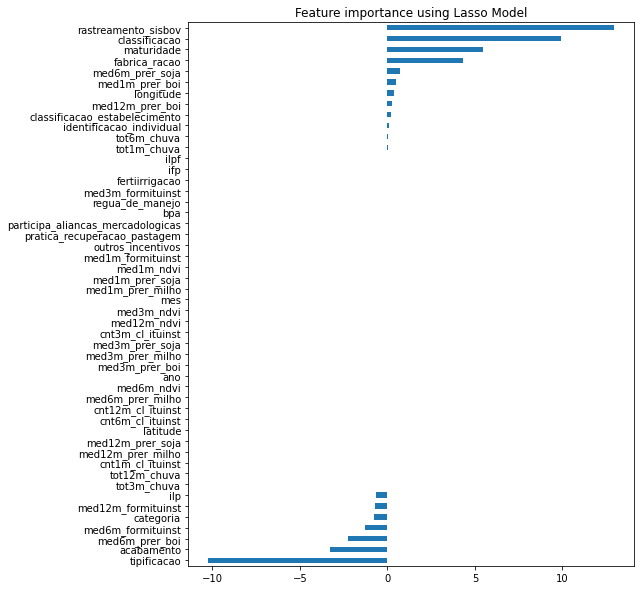

In [33]:
imp_coef = coef.sort_values()
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Validação do Modelo

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [35]:
SEED = 1580
np.random.seed(SEED)
cv = KFold(n_splits = 10, shuffle = True)
lr = LinearRegression()
results = cross_validate(lr, X, y,cv=cv, return_train_score= False)

In [36]:
results

{'fit_time': array([1.65019894, 1.71443963, 1.59108114, 1.50891256, 1.57534981,
        1.52067995, 1.65958691, 1.57404447, 1.53470373, 1.67635703]),
 'score_time': array([0.01514888, 0.02500176, 0.01285338, 0.01252341, 0.0156157 ,
        0.01360345, 0.01800346, 0.01261544, 0.01382875, 0.01454616]),
 'test_score': array([0.16400192, 0.16422532, 0.1634079 , 0.16436064, 0.16483175,
        0.16407403, 0.16034746, 0.16608942, 0.16133543, 0.16290838])}

In [37]:
results['test_score']

array([0.16400192, 0.16422532, 0.1634079 , 0.16436064, 0.16483175,
       0.16407403, 0.16034746, 0.16608942, 0.16133543, 0.16290838])

In [38]:
def imprime_resulado(results) :
    media = results ['test_score'].mean()
    print('Accuracy médio %.2f' % (media*100))
    desvio_padrao = results['test_score'].std()
    print("Accuracy intervalo [ %.2f, %.2f ]" % (media - 2 * desvio_padrao, media + 2 * desvio_padrao))
    

In [39]:
imprime_resulado(results)

Accuracy médio 16.36
Accuracy intervalo [ 0.16, 0.17 ]
